In [2]:
#Importing all the basic libraries

!pip install -U scikit-learn

import pandas as pd 
import numpy as np 

#NLTK libraries
import nltk
import re
import string
import numpy as np
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
#Data frame to read the csv file from kaggle
df1 = pd.read_csv('../input/ecommerce-product-review-data/Product Review Data.csv')
## print shape of dataset with rows and columns and information 
print ("Shape of  data (row, column):"+ str(df1.shape))
print (df1.info())

Shape of  data (row, column):(1597, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-n

In [4]:
#Display first few rows of the data frame
df1.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [5]:
reviews_data=df1.copy()

****Data cleaning process : ****

In [6]:
#Check for null values and filling the NA values
#My contribution
reviews_data.isnull().sum()
reviews_data['reviews.text']=reviews_data['reviews.text'].fillna('Missing')

# Code reference [1]
reviews_data['reviews.text']=reviews_data['reviews.text']+reviews_data['categories']
reviews_data=reviews_data.drop(['reviews.text', 'categories'], axis=1) #dropping uneccesary columns
reviews_data.head()

,id,asins,brand,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [7]:
#Finding the distribution of categories
reviews_data['reviews.rating'].value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

**Function get_sentiment_val() : This function returns the sentiment value based on overall ratings from  users**

In [8]:
#Code reference[1]
def get_sentiment_val(row):
    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] == 4.0 or row['reviews.rating'] == 5.0:
        val = 'Positive'
    elif row['reviews.rating'] == 1.0 or row['reviews.rating'] == 2.0:
        val = 'Negative'
    else:
        val = -1
    return val

In [9]:
# Code reference [1]
#Applying the function in our new column to create the sentiment attribute
reviews_data['sentiment'] = reviews_data.apply(get_sentiment_val, axis=1)
reviews_data.head()

,id,asins,brand,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,...,reviews.rating,reviews.sourceURLs,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,Positive


In [10]:
#My contribution 1: Removed the unnecessary columns which had NaN values for data cleaning
#Dropping all the values which have NaN values
type(reviews_data)
reviews_data.drop(['colors', 'ean', 'manufacturerNumber','reviews.doRecommend','reviews.userCity','reviews.userProvince', 'sizes', 'upc'], axis=1, inplace=True)

**Data obtained after removing the NaN values, empty values i.e after data cleaning step**

In [11]:
reviews_data.head()

,id,asins,brand,dateAdded,dateUpdated,dimension,keys,manufacturer,name,prices,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.title,reviews.username,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"Paperwhite voyage, no regrets!",Cristina M,205 grams,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,One Simply Could Not Ask For More,Ricky,205 grams,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Great for those that just want an e-reader,Tedd Gardiner,205 grams,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Love / Hate relationship,Dougal,205 grams,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I LOVE IT,Miljan David Tanic,205 grams,Positive


In [12]:
#Creating a copy 
cleaned_review_data=reviews_data.copy()

****More data cleaning using re : ****


--> review_cleaning() function converts the text into lowercase,removes links, punctuations and removed words having numbers


In [13]:
#My contribution:
def review_cleaning(txt):
    txt = str(txt).lower()        #convert to lower case
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt) #Removes punctuations
    txt = re.sub('\n', '', txt)
    txt = re.sub('\w*\d\w*', '', txt)
    txt = re.sub('\[.*?\]', '', txt)
    txt = re.sub('https?://\S+|www\.\S+', '', txt) #Removes the text starting with www
    txt = re.sub('<.*?>+', '', txt)
    return txt

In [14]:
reviews_data['reviews.numHelpful'].value_counts()

0.0      504
2.0       23
3.0       18
1.0       16
5.0       15
        ... 
834.0      1
323.0      1
102.0      1
790.0      1
136.0      1
Name: reviews.numHelpful, Length: 182, dtype: int64

**Performs all kinds of data cleaning i.e removes unneccesary punctuations etc from the text : **

In [15]:
#Code reference [1]
reviews_data['reviews.title']=reviews_data['reviews.title'].apply(lambda x:review_cleaning(x))
reviews_data.head()

,id,asins,brand,dateAdded,dateUpdated,dimension,keys,manufacturer,name,prices,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.title,reviews.username,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,paperwhite voyage no regrets,Cristina M,205 grams,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,one simply could not ask for more,Ricky,205 grams,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,great for those that just want an ereader,Tedd Gardiner,205 grams,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,love hate relationship,Dougal,205 grams,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,i love it,Miljan David Tanic,205 grams,Positive


Creating a list of generic stop words :

In [16]:
#Code reference [1] & my contribution
stop_words_list = ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']


In [17]:
#Code reference [1]
reviews_data['reviews.title'] = reviews_data['reviews.title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
reviews_data.head()

,id,asins,brand,dateAdded,dateUpdated,dimension,keys,manufacturer,name,prices,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.title,reviews.username,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,paperwhite voyage no regrets,Cristina M,205 grams,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,one simply could not ask,Ricky,205 grams,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,great want ereader,Tedd Gardiner,205 grams,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,love hate relationship,Dougal,205 grams,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,love,Miljan David Tanic,205 grams,Positive


Explore if a relation exists between sentiment and numHelpful

In [18]:
#Comparison is made based on the mean of the values
if reviews_data['sentiment'] is not -1:
    pd.DataFrame(reviews_data.groupby('sentiment')['reviews.numHelpful'].mean())

**Adding polarity, review length and word count to the existing data for the text analysis**

In [19]:
#Code reference [1]
reviews_data['polarity'] = reviews_data['reviews.title'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews_data['review_len'] = reviews_data['reviews.title'].astype(str).apply(len)
reviews_data['word_count'] = reviews_data['reviews.title'].apply(lambda x: len(str(x).split()))
reviews_data.head()

,id,asins,brand,dateAdded,dateUpdated,dimension,keys,manufacturer,name,prices,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.title,reviews.username,weight,sentiment,polarity,review_len,word_count
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",...,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,paperwhite voyage no regrets,Cristina M,205 grams,Positive,0.05,28,4
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",...,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,one simply could not ask,Ricky,205 grams,Positive,0.00,24,5
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",...,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,great want ereader,Tedd Gardiner,205 grams,Positive,0.80,18,3
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",...,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,love hate relationship,Dougal,205 grams,Positive,-0.15,22,3
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",...,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,love,Miljan David Tanic,205 grams,Positive,0.50,4,1


**Creating word counts for positive and negative vocabulary**

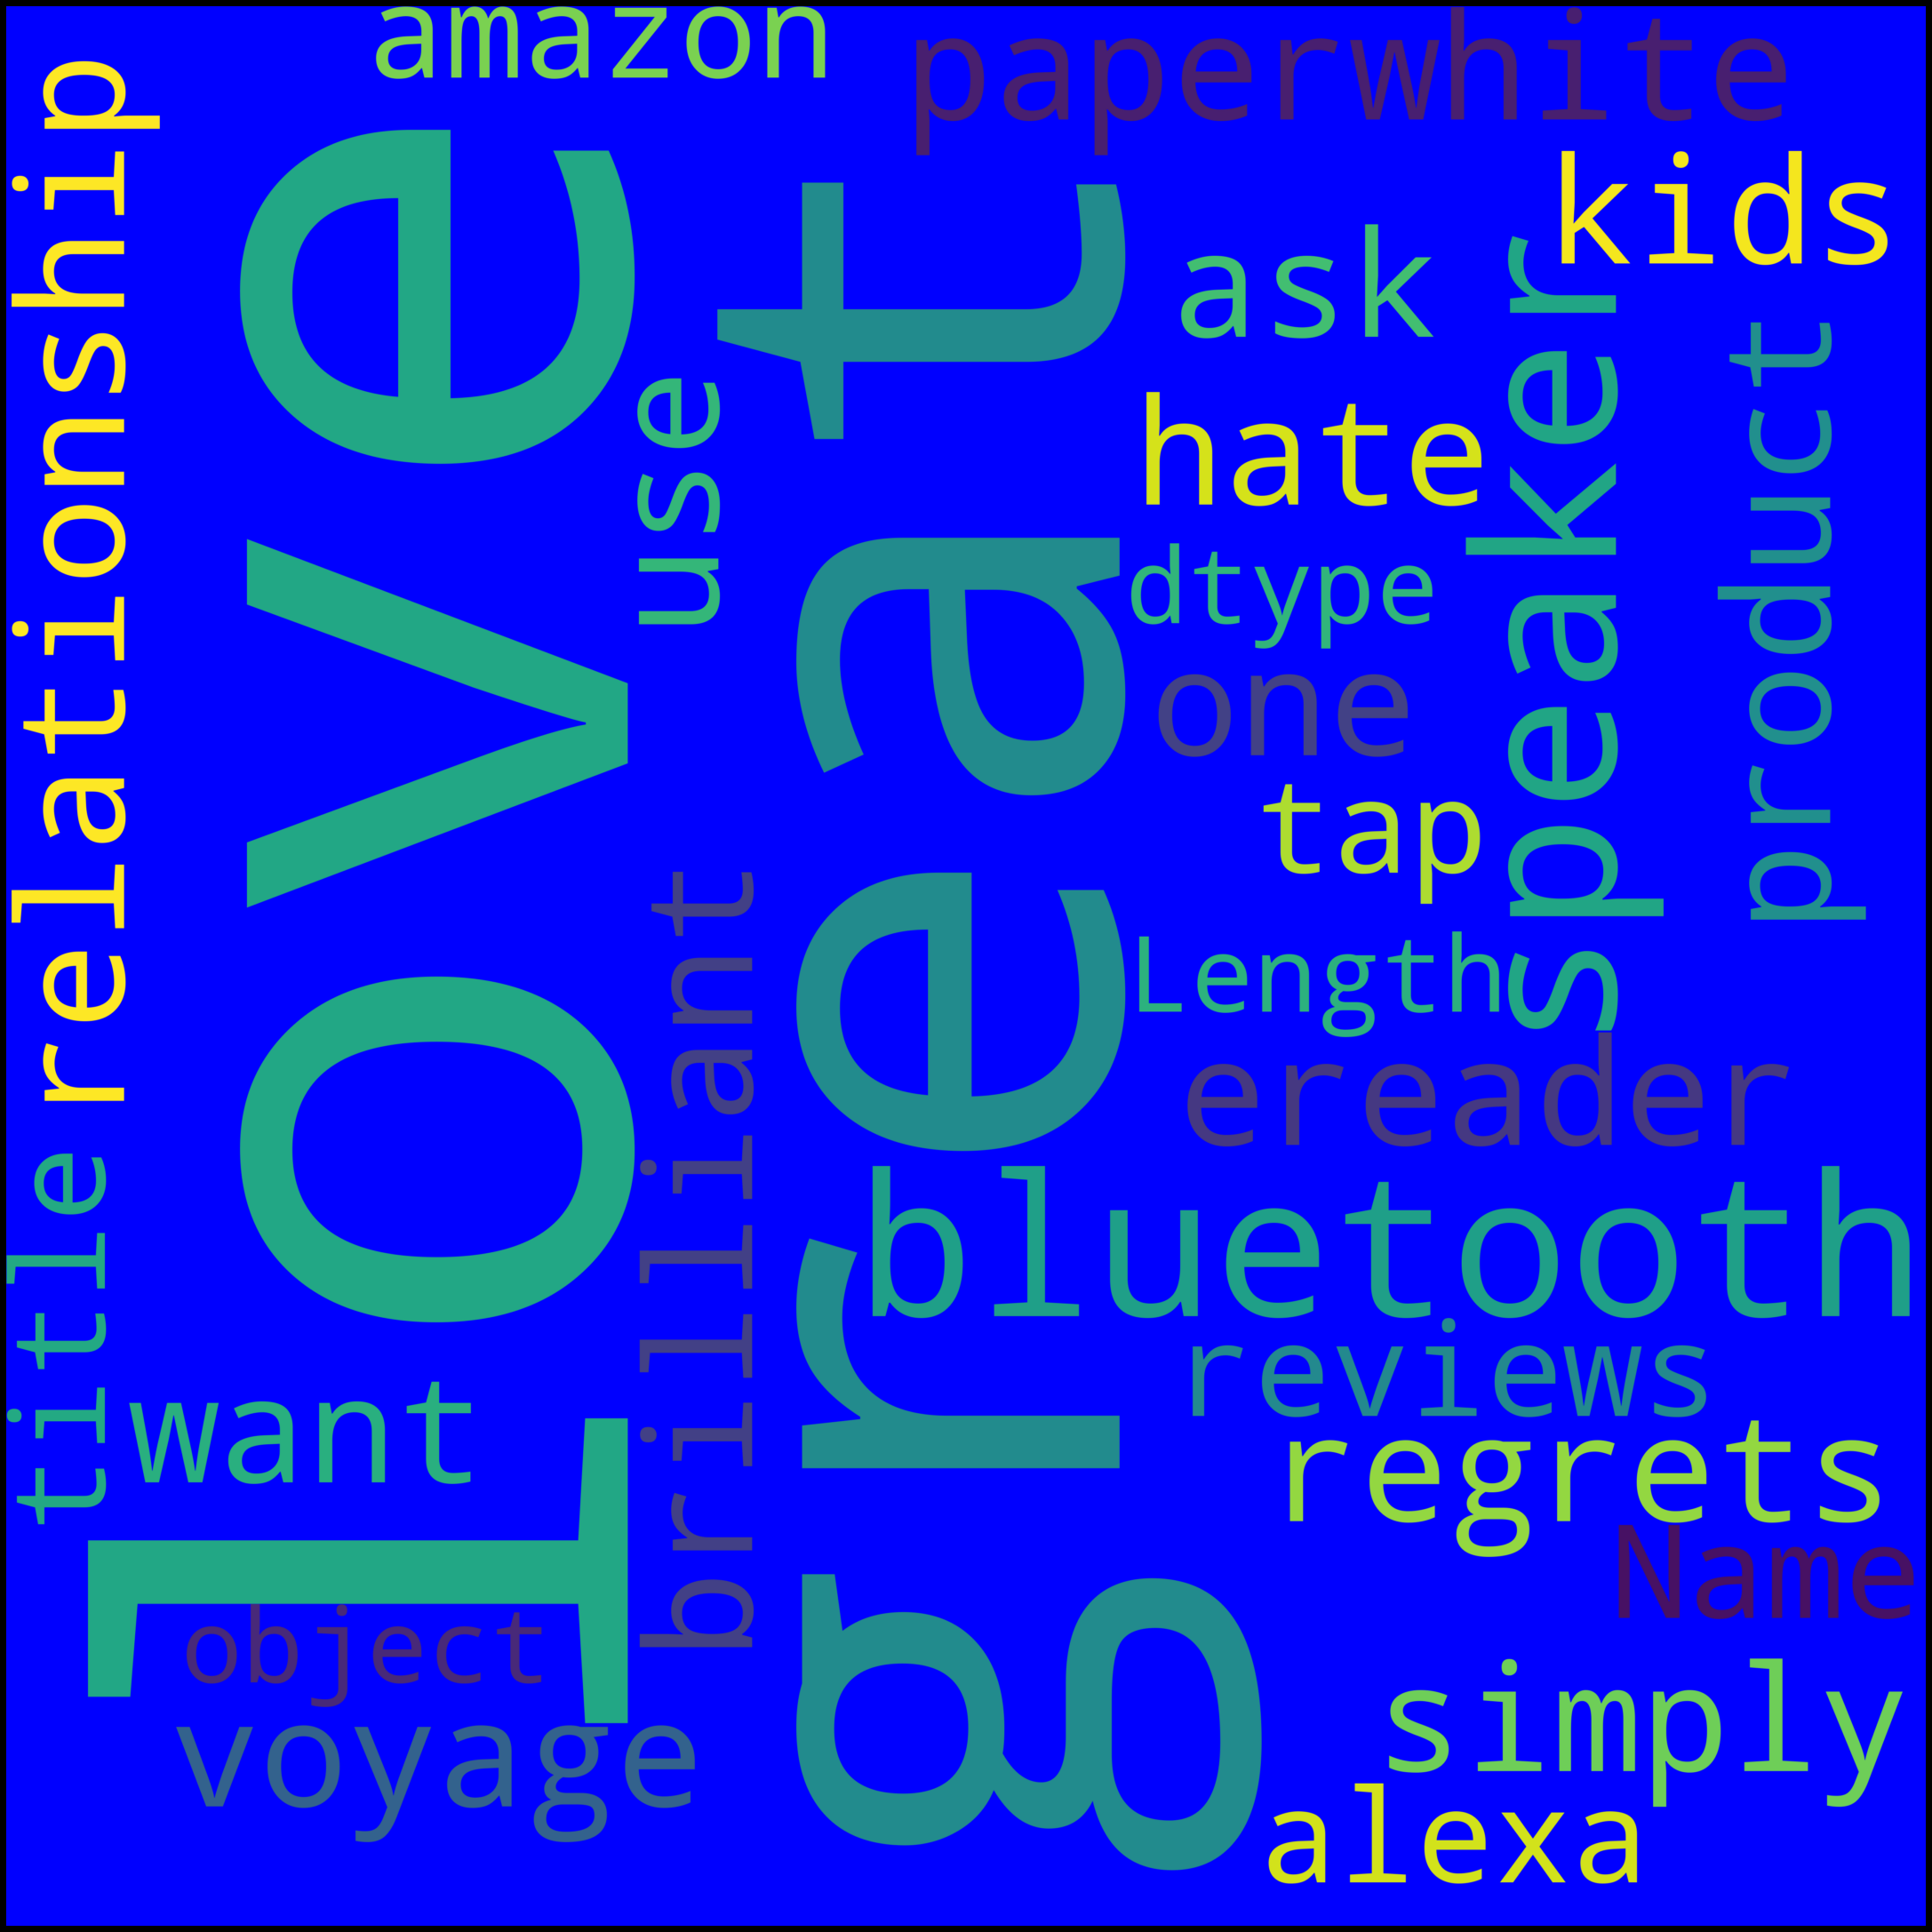

In [20]:
#My contribution :
#Filtering data by removing uneccesary N/A values from sentiment
positive_rev = reviews_data[reviews_data["sentiment"]=='Positive'].dropna()
neutral_rev = reviews_data[reviews_data["sentiment"]=='Neutral'].dropna()
neg_rev = reviews_data[reviews_data["sentiment"]=='Negative'].dropna()

#Creating word cloud for positive,negative words
txt = positive_rev["reviews.title"]
wordcloud = WordCloud(
    width = 5000,
    height = 5000,
    background_color = 'blue',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

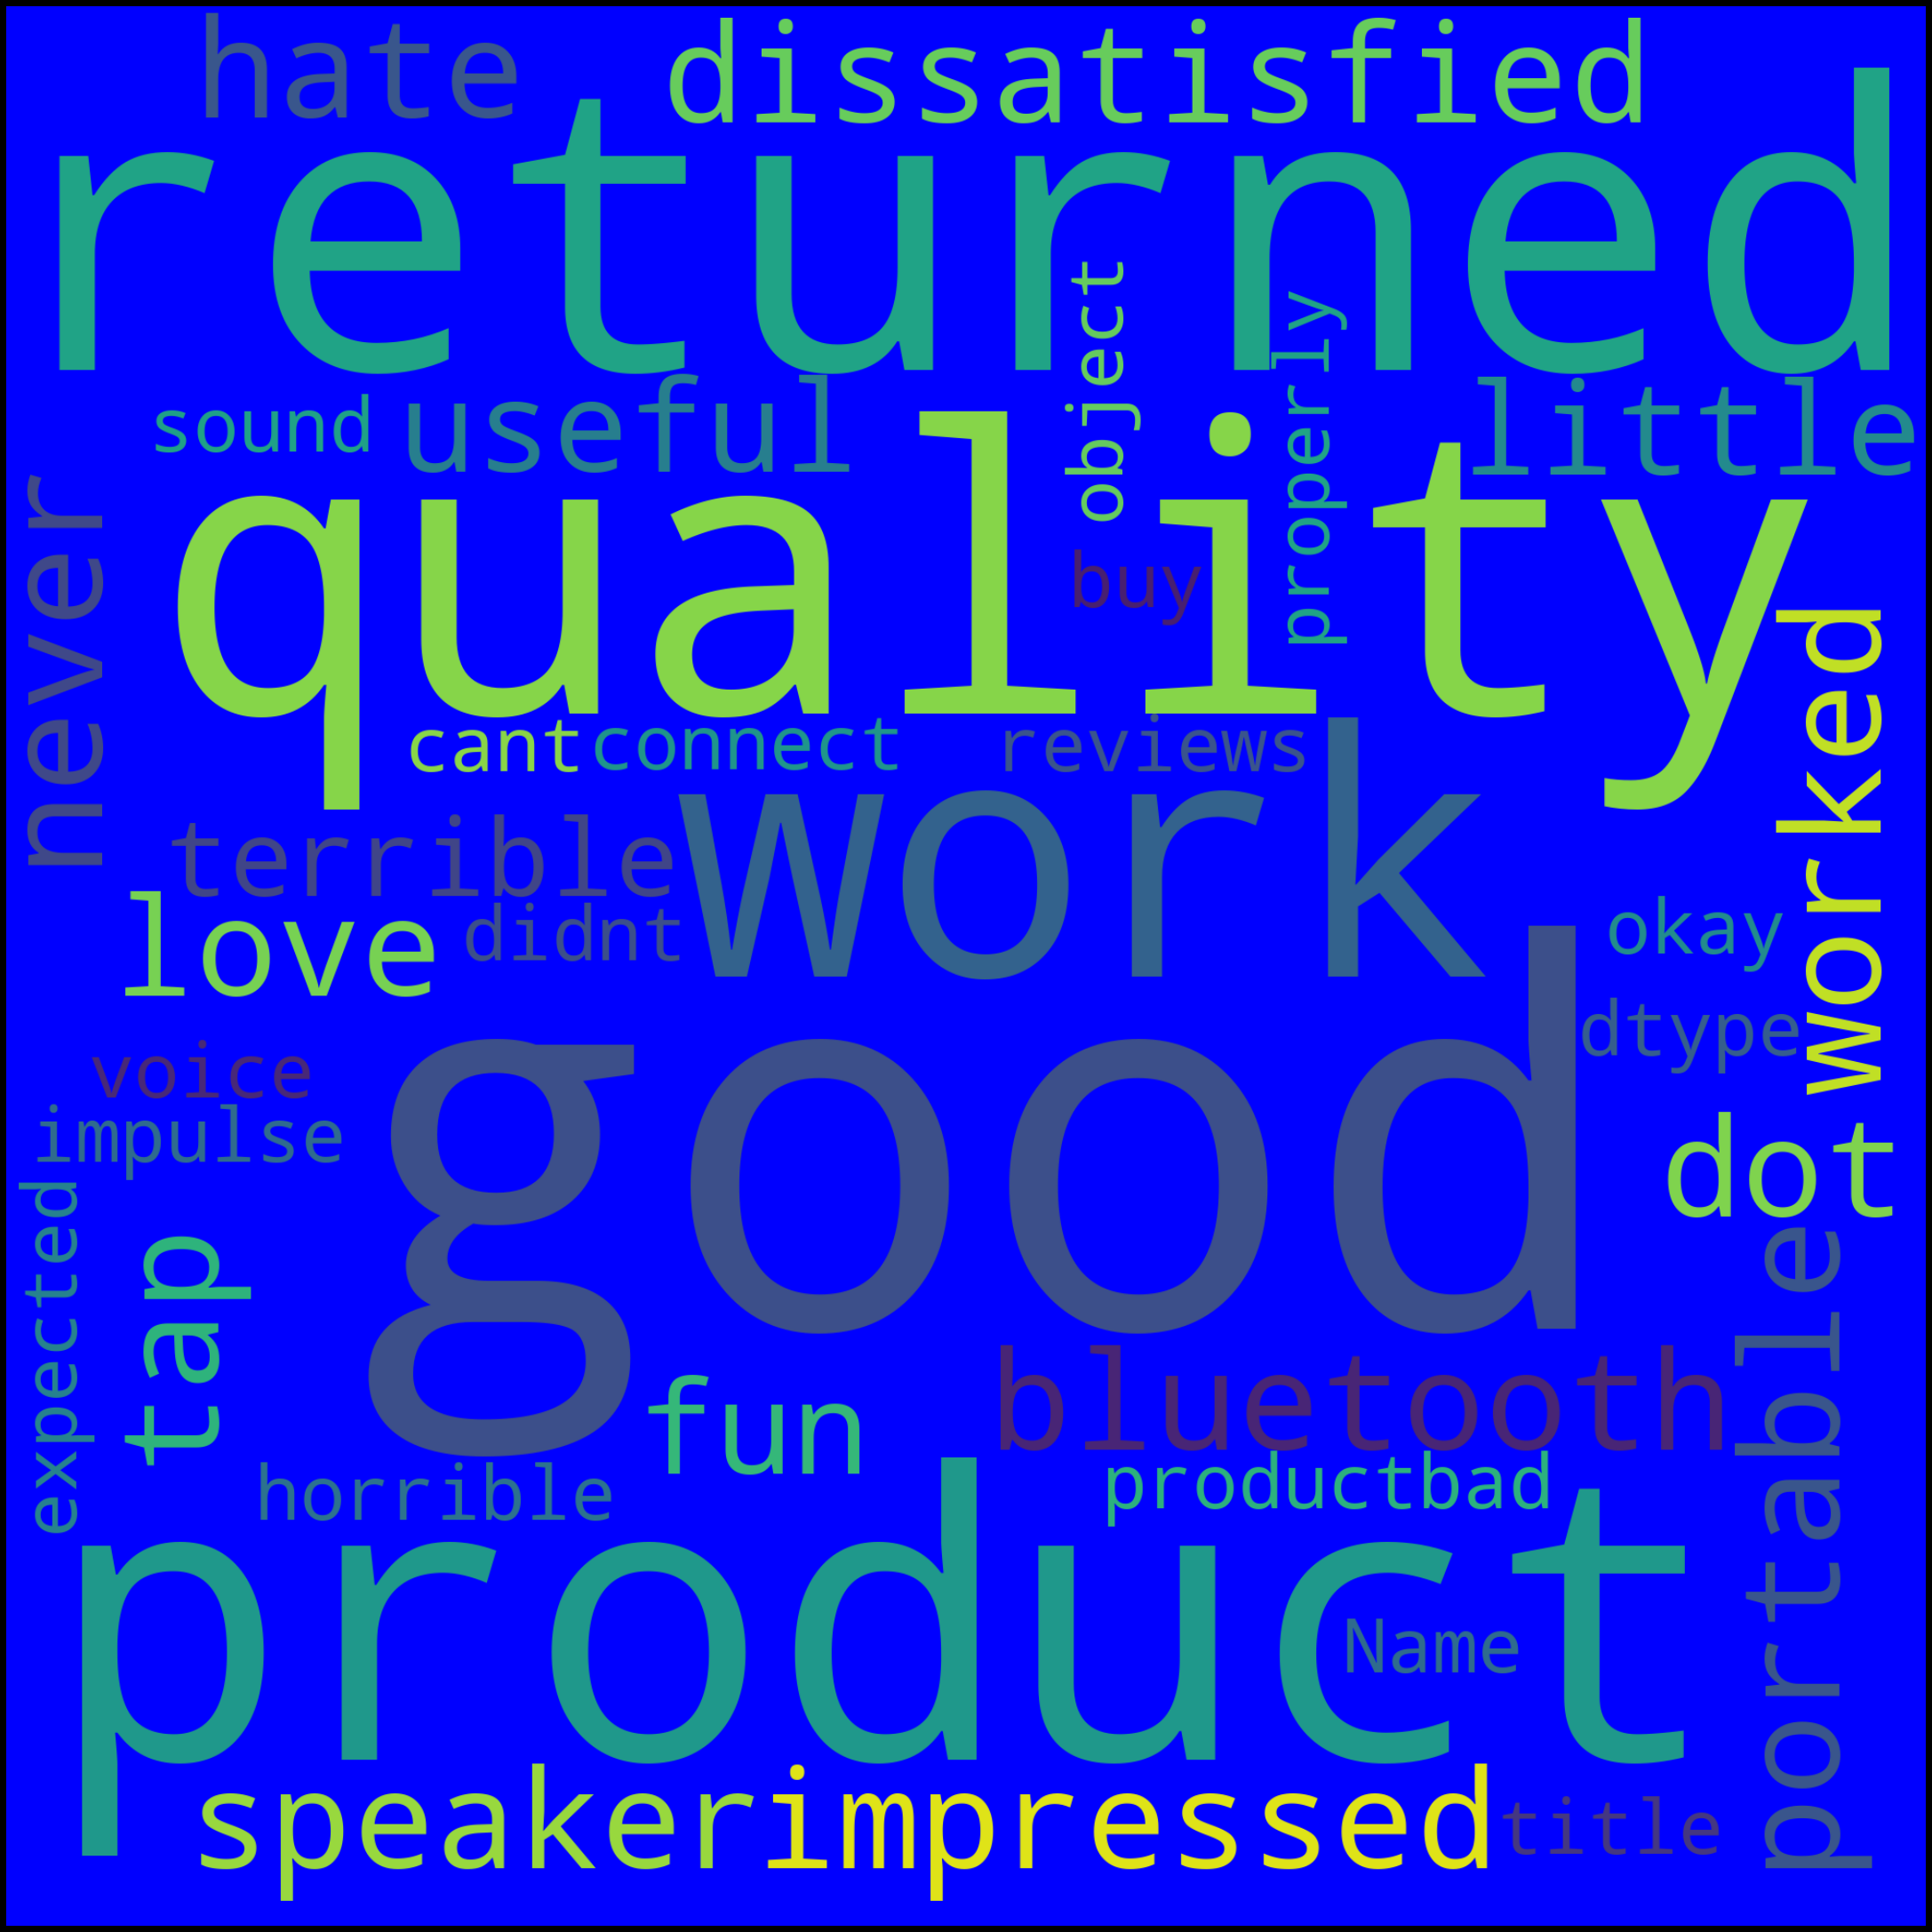

In [21]:
#My contribution:
#Word cloud for negative reviews

txt = neg_rev["reviews.title"]
wordcloud = WordCloud(
    width = 2000,
    height = 2000,
    background_color = 'blue',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
reviews_data['sentiment']
type(reviews_data)
reviews_data['sentiment'] = reviews_data['sentiment'].astype(str) #converting the sentiment field to string

**Extracting Features from cleaned review data as the requirement is to convert the review texts into a vector by using TF-TDF method to convert the texts and encoding target variable-sentiment**


In [23]:
#Code reference [1]
# call the label encoder function
encode_label = preprocessing.LabelEncoder() 
  
# Encode labels 'sentiment' column 
reviews_data['sentiment']= encode_label.fit_transform(reviews_data['sentiment']) 
  
reviews_data['sentiment'].unique() 

array([3, 0, 2, 1])

In [24]:
#Displaying the value counts of the sentiment field
reviews_data['sentiment'].value_counts()

3    977
0    420
2    124
1     76
Name: sentiment, dtype: int64

**Stemming process on the words**


In [25]:
#Code reference [1]
#Applying stemming on the words:
#Extracting 'reviews' for processing
review_features=reviews_data.copy()
review_features=review_features[['reviews.title']].reset_index(drop=True)
review_features.head()

#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words while rejecting stopwords
corpus = []
for i in range(0, len(review_features)):
    review_1 = re.sub('[^a-zA-Z]', ' ', review_features['reviews.title'][i])
    review_1 = review_1.split()
    review_1 = [ps.stem(word) for word in review_1 if not word in stop_words_list]
    review_1 = ' '.join(review_1)
    corpus.append(review_1)    
    
corpus[3]

tfidf_vectorizer = TfidfVectorizer(max_features=7000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews.title'])

#Stores the encoded target variable
y=reviews_data['sentiment']
X.shape

print(f'Original shape of dataset : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

#to check if there is equal distribution of classes after resampling the data
print(f'Resampled shape of dataset : {Counter(y_res)}')

Original shape of dataset : Counter({3: 977, 0: 420, 2: 124, 1: 76})
Resampled shape of dataset : Counter({3: 977, 0: 977, 2: 977, 1: 977})


Train-Test split :
**Performing 80-20 train-test split**

In [26]:
#Displaying the shape of test and train data after 20-80 split
#My Contribution
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3126, 1988)
(782, 1988)
(3126,)
(782,)


**Model Building: Sentiment Analysis**

    This function prints and plots the confusion matrix.
    Normalization is applied by setting `normalize=True`.
   

In [60]:
#----Code reference[1]---#
def plot_confusion_matrix(cmatrix, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    
    plt.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick = np.arange(len(classes))
    plt.xticks(tick, classes, rotation=45)
    plt.yticks(tick, classes)

    if normalize==False:
        print('Confusion matrix, without normalization')
       
    else:
        cmatrix = cmatrix.astype('float') / cmatrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

    thresh = cmatrix.max() / 2.
    for i in range (cmatrix.shape[0]):
        for j in range (cmatrix.shape[1]):
            plt.text(j, i, cmatrix[i, j],
                 horizontalalignment="center",
                 color="white" if cmatrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True values')
    plt.xlabel('Predicted values')
#----Code reference[1]---#

Out of all the classifiers, without using hypertuning of parameter, the obtained Bernoulli Naive Bayes test accuracy is comparatively high i.e 66.25%

My contribution : 
Created objects to store the results of below mentioned ML models and found accuracy scores, and plotted the bar graph to compare accuracies

Logistic Regression Test Accuracy: 0.6162185534591196
Decision Tree Test Accuracy: 0.6319143081761006
KNN Test Accuracy: 0.5568592767295598
SVC Test Accuracy: 0.6125314465408805
Multinomial NB Test Accuracy: 0.615558176100629
Bernoulli NB Test Accuracy: 0.6625157232704402


<BarContainer object of 6 artists>

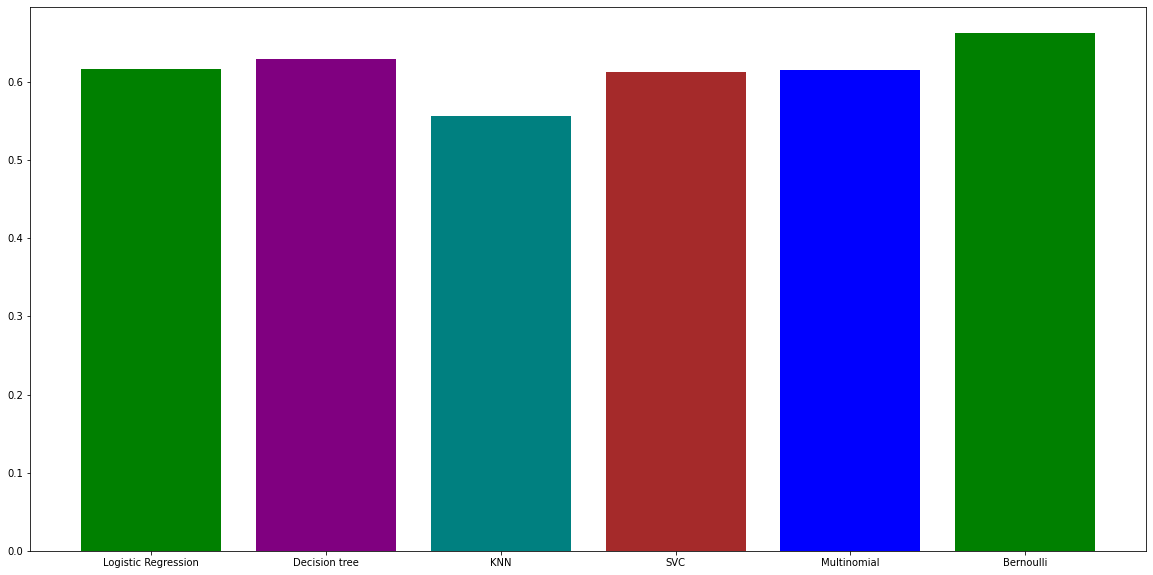

In [61]:
#My contribution
#Creating objects for different types of machine learning model implementation
logreg = LogisticRegression(random_state=0)
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
mnb=sklearn.naive_bayes.MultinomialNB()
bnb=sklearn.naive_bayes.BernoulliNB()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Multinomial NB',5:'Bernoulli NB'}
models=[logreg,dt,knn,svc,mnb,bnb]

acc_1=cross_val_score(logreg, X, y, cv=10, scoring ='accuracy').mean()
acc_2=cross_val_score(dt, X, y, cv=10, scoring ='accuracy').mean()
acc_3=cross_val_score(knn, X, y, cv=10, scoring ='accuracy').mean()
acc_4=cross_val_score(svc, X, y, cv=10, scoring ='accuracy').mean()
acc_5=cross_val_score(mnb, X, y, cv=10, scoring ='accuracy').mean()
acc_6=cross_val_score(bnb, X, y, cv=10, scoring ='accuracy').mean()

for i,model in enumerate(models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))
model = ["Logistic Regression","Decision tree","KNN","SVC","Multinomial","Bernoulli"]
scores = [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6]
colors = ['green', 'purple', 'teal', 'brown', 'blue']
plt.rcParams["figure.figsize"] = [20, 10]
plt.bar(model, scores, color=colors)


**Hyper-parameter tuning on decision tree classifier:**

The hyperparameters like max_depth, max_features, min_samples_leaf, gini and entropy are set for different values and applied to tune the decision tree, this results in the accuracy score - 67.59%

My contribution : 
Hyperparameter grid - 2 - changed max_features, max_depth, min_samples_leaf

In [62]:
#Hyper parameter tuning on decision tree classifier
# Necessary imports
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
 
param_dist1 = {"max_depth": [3, None],
              "max_features": randint(3, 10),
              "min_samples_leaf": randint(3, 10),
              "criterion": ["gini", "entropy"]} 

# Creating the hyperparameter grid 2
#-----My contribution-----#
param_dist2 = {"max_depth": [5, None],
              "max_features": randint(5, 50),
              "min_samples_leaf": randint(5, 50),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv1 = RandomizedSearchCV(tree, param_dist1, cv = 10)
tree_cv2 = RandomizedSearchCV(tree, param_dist2, cv = 50) 
tree_cv1.fit(X, y)
tree_cv2.fit(X,y)

#-----My contribution-----#

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters set-1: {}".format(tree_cv1.best_params_))
print("Best score is {}".format(tree_cv1.best_score_))

print("Tuned Decision Tree Parameters set-2: {}".format(tree_cv2.best_params_))
print("Best score is {}".format(tree_cv2.best_score_))

Tuned Decision Tree Parameters set-1: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 9}
Best score is 0.6267688679245282
Tuned Decision Tree Parameters set-2: {'criterion': 'gini', 'max_depth': None, 'max_features': 36, 'min_samples_leaf': 6}
Best score is 0.6507661290322581


**Hyper parameter tuning on SVM:**
Reference: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/?ref=rp


By setting gamma, C and kernel parameters to 'rbf','sigmoid','linear'

The accuracy is the highest when the kernel is set to 'Radial Basis Function'.


In [63]:
#-----My contribution-----#
def svm_classify(parameters):
    grid1 = GridSearchCV(SVC(), parameters, refit = True, verbose = 5)
  
    # fitting the model
    grid1.fit(X_train, y_train)
#-----My contribution-----#

#----Code reference[3]-------#    
    # print best parameter
    print(grid1.best_params_)
  
    # model after hyper-parameter tuning
    print(grid1.best_estimator_)

    grid_preds = grid1.predict(X_test)
  
    print(classification_report(y_test, grid_preds))
#----Code reference[3]-------#   

In [64]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range using kernel=rbf
rbf_param_grid = {'C': [0.1, 1, 20, 100, 1000], 
              'gamma': [1, 0.1, 0.02, 0.001],
              'kernel': ['rbf']} 
print("For kernel using radial basis function")
svm_classify(rbf_param_grid)
#-----My contribution-----# 
linear_param_grid = {'C': [0.1, 1, 30, 100, 1000], 
              'kernel': ['linear']} 
print("For kernel using linear")
svm_classify(linear_param_grid)

For kernel using radial basis function
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.592 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.460 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.427 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.440 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.02, kernel=rbf;, score=0.256 total time=   0.4s
[CV 2/5]

In [65]:
#-----My contribution-----#
sigmoid_param_grid = {'C': [0.00001, 0.1, 5, 2, 50],
              'kernel': ['sigmoid']}
print("For kernel using sigmoid function")
svm_classify(sigmoid_param_grid)
#-----My contribution-----#

For kernel using sigmoid function
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........C=1e-05, kernel=sigmoid;, score=0.256 total time=   0.4s
[CV 2/5] END ...........C=1e-05, kernel=sigmoid;, score=0.254 total time=   0.4s
[CV 3/5] END ...........C=1e-05, kernel=sigmoid;, score=0.254 total time=   0.4s
[CV 4/5] END ...........C=1e-05, kernel=sigmoid;, score=0.254 total time=   0.4s
[CV 5/5] END ...........C=1e-05, kernel=sigmoid;, score=0.254 total time=   0.4s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.540 total time=   0.3s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.486 total time=   0.3s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.515 total time=   0.3s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.515 total time=   0.3s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.482 total time=   0.3s
[CV 1/5] END ...............C=5, kernel=sigmoid;, score=0.720 total time=   0.2s
[CV 2/5] END ..

**Hyper parameter tuning on logistic regression**

My contribution : Set the 'verbose' : 1 and random_state to 1 in order to acquire 4% better accuracy than the one obtained in the reference.

In [66]:
#---Code reference[1]---#
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
#---My contribution---#
clf = GridSearchCV(LogisticRegression(random_state=1), param_grid,cv=9, verbose=1,n_jobs=-1)
b_model = clf.fit(X_train,y_train)

print(b_model.best_estimator_)
#---My contribution---#
print("The mean accuracy of the model is:",b_model.score(X_test,y_test))

import warnings
warnings.filterwarnings("ignore")
#---Code reference[1]---#

Fitting 9 folds for each of 100 candidates, totalling 900 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=3237.45754281764, random_state=1)
The mean accuracy of the model is: 0.7877237851662404


In [68]:
#Code reference[1]
logreg = LogisticRegression(C=15000.0, random_state=1)
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [69]:
print(y_test)

print("yPredict:\n",y_predict)

2480    1
3244    2
453     0
1715    0
3636    2
       ..
3241    2
3320    2
1726    0
1947    0
1694    0
Name: sentiment, Length: 782, dtype: int64
yPredict:
 [1 2 0 2 2 0 0 0 2 1 3 0 3 3 2 2 0 2 1 0 1 2 2 1 2 2 3 2 0 2 2 2 0 2 1 0 1
 1 0 3 1 0 1 3 1 0 2 1 2 2 2 1 1 1 3 3 0 3 1 1 0 2 0 3 1 2 1 1 1 1 0 2 0 2
 2 1 2 0 2 0 1 1 1 2 1 0 2 3 0 1 1 3 2 3 1 1 0 3 1 1 3 3 2 1 2 1 1 1 2 1 2
 1 1 3 3 2 3 2 1 0 1 1 0 2 3 2 0 1 2 2 1 2 0 2 0 1 1 2 1 3 1 3 2 1 2 2 1 3
 3 0 1 3 2 3 1 1 1 2 0 1 1 1 3 1 0 2 2 0 1 2 1 2 2 1 1 1 1 1 0 3 2 0 0 1 2
 1 2 2 2 2 1 0 3 3 2 1 0 0 0 2 0 3 2 2 1 0 1 3 3 3 2 1 3 1 1 2 1 1 3 2 2 1
 3 2 1 1 0 1 2 2 0 0 1 2 1 2 0 2 3 2 2 2 2 1 2 2 2 0 0 0 0 2 2 0 3 3 1 3 0
 2 0 0 0 0 1 1 0 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 2 0 2 0 1 1 1 0 0 2 3 0 3 3
 2 1 1 0 2 3 0 2 2 0 0 2 2 2 1 2 3 0 2 1 2 1 0 0 1 0 1 0 1 0 0 2 2 3 1 2 1
 1 1 2 2 1 1 2 1 1 0 1 1 2 0 1 2 0 2 1 1 3 2 1 1 3 1 0 1 1 0 2 2 0 3 1 1 1
 2 2 2 1 1 0 1 1 1 2 2 1 1 0 1 1 3 0 0 1 3 2 0 1 0 2 1 2 3 0 2 1 1 0 2 2 0
 1 1 2 0 1 

**Contribution :**

Created the confusion matrix below.


Normalized confusion matrix
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       181
           1       0.65      1.00      0.79       194
           2       0.90      0.90      0.90       209
           3       0.94      0.45      0.61       198

    accuracy                           0.79       782
   macro avg       0.82      0.79      0.77       782
weighted avg       0.83      0.79      0.78       782

[[145  14  18   4]
 [  0 194   0   0]
 [  1  18 188   2]
 [ 32  73   4  89]]


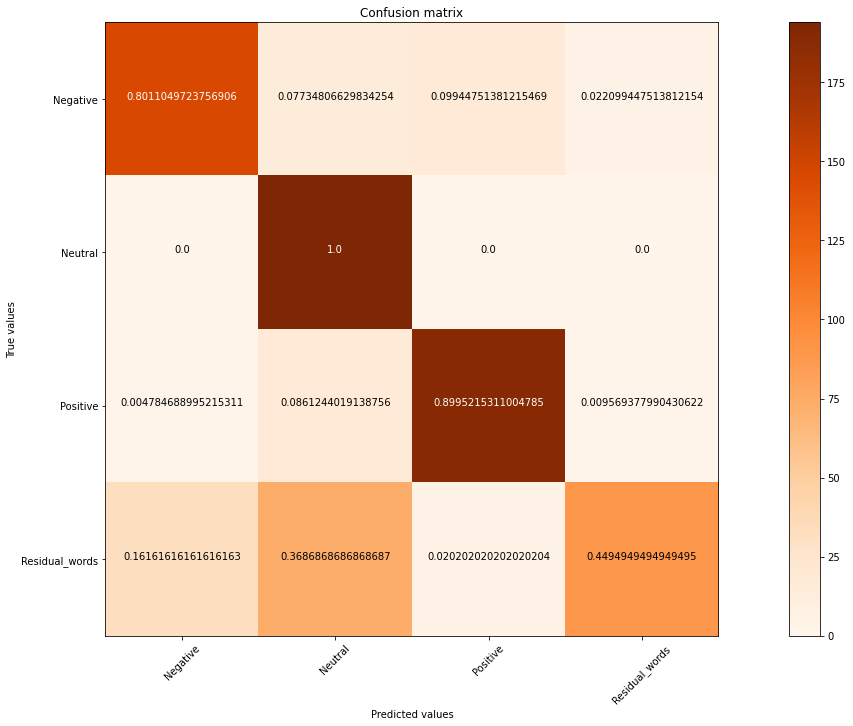

In [70]:
import seaborn as sn
from sklearn.metrics import confusion_matrix 

cmatrix = metrics.confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cmatrix, classes=['Negative','Neutral','Positive','Residual_words'])

print("Classification Report:\n",classification_report(y_test, y_predict))
print(cmatrix)

According to the above obtained heat map, it proves that there is a chance for residual words due to the accuracy of the model being 79%

In [72]:
print(cmatrix)

[[145  14  18   4]
 [  0 194   0   0]
 [  1  18 188   2]
 [ 32  73   4  89]]


In [74]:
print(y_test.shape)
print(y_predict.shape)

(782,)
(782,)


**KNN - hyper parameter tuning :
**
Code Reference : [3]

My contribution : 
Experimented the tuning of hyperparameters like k-value, verbose and cv. 


In [75]:
#----code reference [2]----#
grid_params1 = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#----code reference [2]----#
grid_search = GridSearchCV(KNeighborsClassifier(), grid_params1, verbose = 2, cv=3, n_jobs = -1)
# fit the model on our train set
g_rs = grid_search.fit(X_res, y_res)
g_rs.best_params_
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_res, y_res)
y_ht = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_ht))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Training set accuracy:  0.7456813819577736
Test set accuracy:  0.7480818414322251


In [76]:
#---My contribution---#
grid_search = GridSearchCV(KNeighborsClassifier(), grid_params1, verbose = 2, cv=3, n_jobs = -1)
# fit the model on our train set
g_rs = grid_search.fit(X_res, y_res)
g_rs.best_params_
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',algorithm = 'auto',metric = 'minkowski')
knn.fit(X_res, y_res)
y_ht = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_ht))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
#---My contribution---#

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Training set accuracy:  0.8752399232245681
Test set accuracy:  0.8721227621483376


References : 
[1] https://www.kaggle.com/code/benroshan/sentiment-analysis-amazon-reviews#Extracting-Features-from-Cleaned-reviews

[2]https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning

[3]https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/?ref=rp